# 3. DSA 데이터를 이용한 AE 응용 실습

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_csv('C:\\Users\\akasa\\Downloads\\DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [5]:
df.isnull().value_counts()

T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  T_yacc_std  T_yacc_skew  T_zacc_mean  T_zacc_max  T_zacc_min  T_zacc_var  T_zacc_std  T_zacc_skew  T_xgyro_mean  T_xgyro_max  T_xgyro_min  T_xgyro_var  T_xgyro_std  T_xgyro_skew  T_ygyro_mean  T_ygyro_max  T_ygyro_min  T_ygyro_var  T_ygyro_std  T_ygyro_skew  T_zgyro_mean  T_zgyro_max  T_zgyro_min  T_zgyro_var  T_zgyro_std  T_zgyro_skew  T_xmag_mean  T_xmag_max  T_xmag_min  T_xmag_var  T_xmag_std  T_xmag_skew  T_ymag_mean  T_ymag_max  T_ymag_min  T_ymag_var  T_ymag_std  T_ymag_skew  T_zmag_mean  T_zmag_max  T_zmag_min  T_zmag_var  T_zmag_std  T_zmag_skew  RA_xacc_mean  RA_xacc_max  RA_xacc_min  RA_xacc_var  RA_xacc_std  RA_xacc_skew  RA_yacc_mean  RA_yacc_max  RA_yacc_min  RA_yacc_var  RA_yacc_std  RA_yacc_skew  RA_zacc_mean  RA_zacc_max  RA_zacc_min  RA_zacc_var  RA_zacc_std  RA_zacc_skew  RA_xgyro_mean  RA_xgyro_max  RA_xgyro_min  RA_xgyro_var  RA_xgyro_std  RA_xg

In [6]:
df['people'] = df['people'].replace({'p1': '0','p2' : '1','p3': '2','p4' : '3','p5': '4','p6' : '5','p7': '6','p8' : '7'})
df['people'] = df['people'].astype('float64')

In [7]:
df.dtypes

T_xacc_mean     float64
T_xacc_max      float64
T_xacc_min      float64
T_xacc_var      float64
T_xacc_std      float64
                 ...   
LL_zmag_var     float64
LL_zmag_std     float64
LL_zmag_skew    float64
activity         object
people          float64
Length: 272, dtype: object

남은 열들: Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_var', 'T_xacc_std', 'T_yacc_mean',
       'T_yacc_max', 'T_yacc_min', 'T_yacc_var', 'T_yacc_std', 'T_zacc_max',
       ...
       'LL_ymag_mean', 'LL_ymag_max', 'LL_ymag_min', 'LL_ymag_var',
       'LL_ymag_std', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std'],
      dtype='object', length=211)


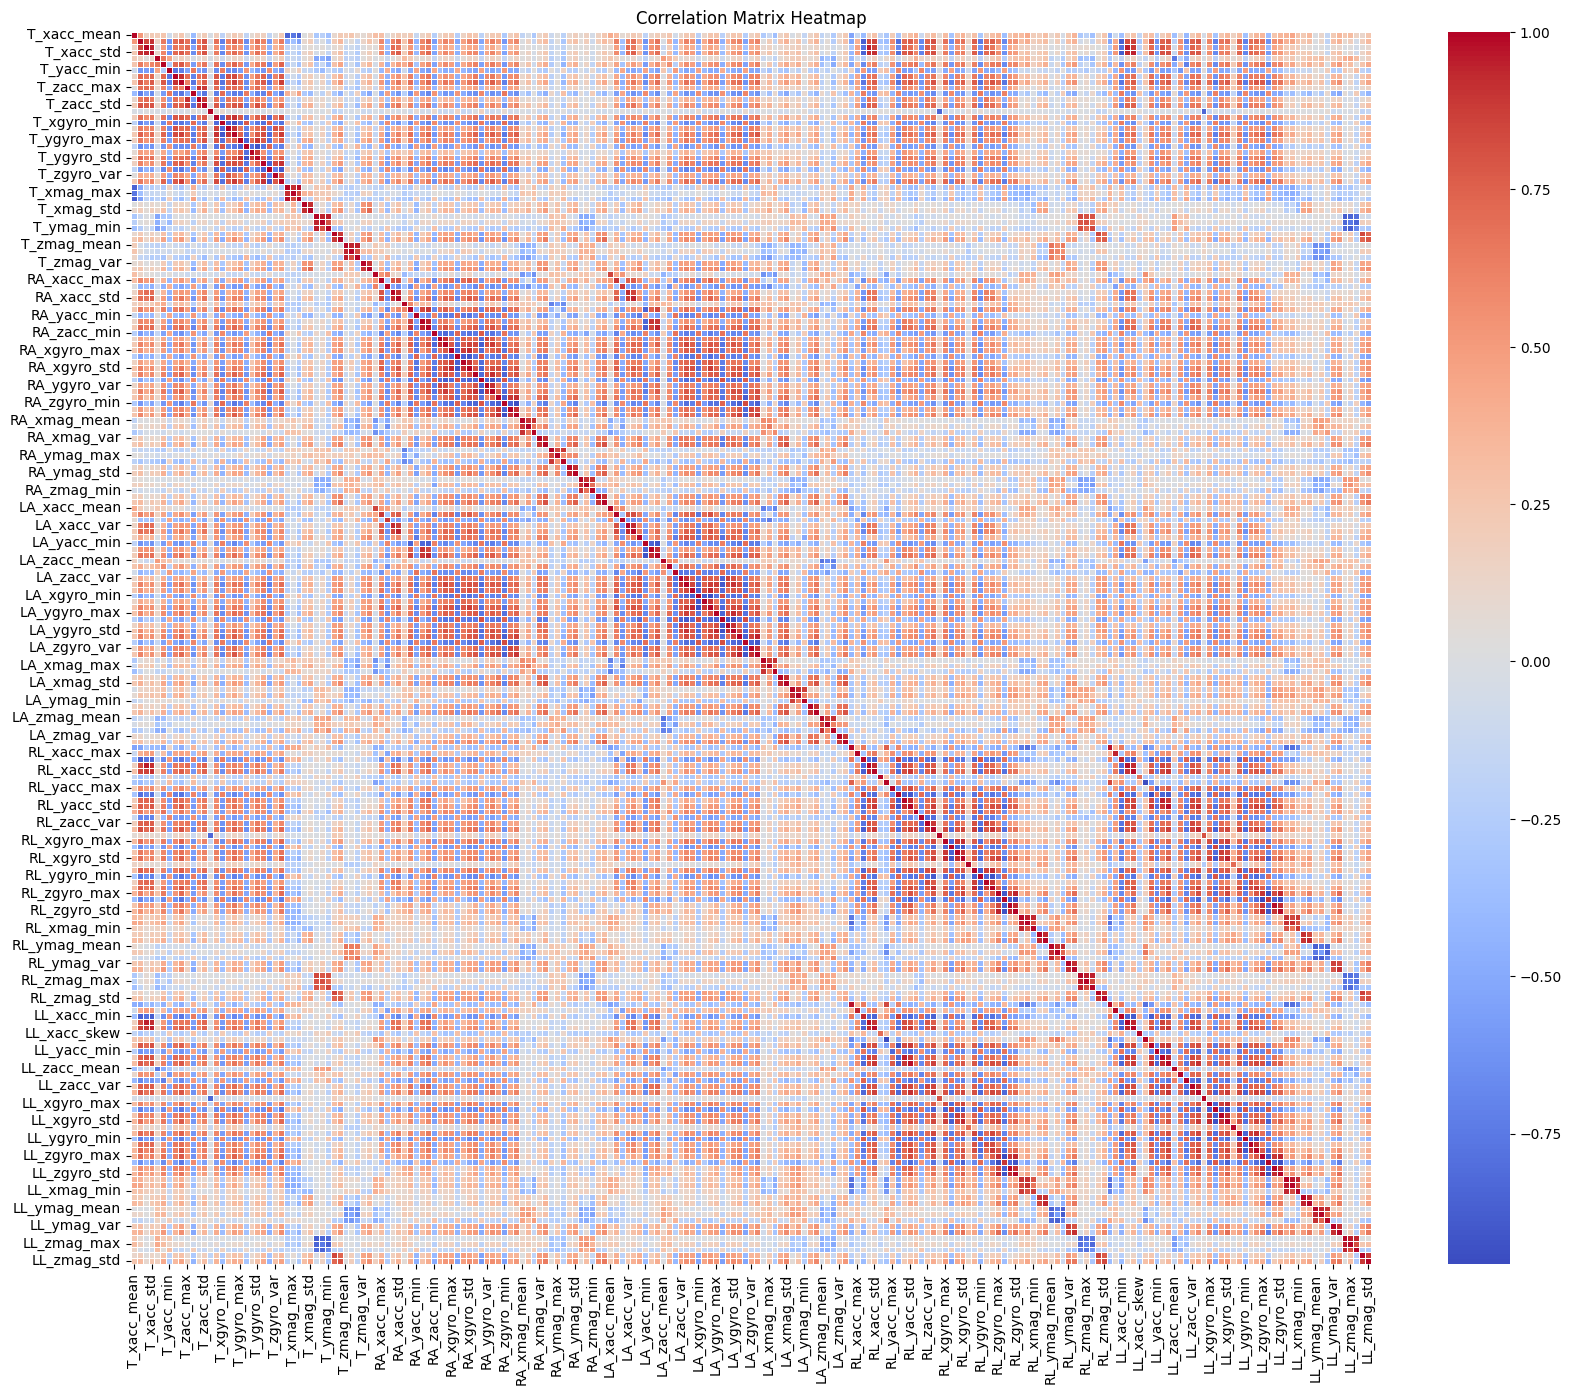

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 'activity' 열 제거
df_check = df.drop('activity', axis=1)

# 상관관계 행렬 계산
corr_matrix = df_check.corr()

# 절대값 상관관계 행렬 계산
abs_matrix = corr_matrix.abs()

# 대각선 요소를 0으로 설정
np.fill_diagonal(abs_matrix.values, 0)

# 임계값 설정
threshold = 0.7

# 약한 상관관계를 가진 열들 찾기
corr_columns = abs_matrix.columns[(abs_matrix.max() < threshold)]

# 약한 상관관계를 가진 열들 삭제
df_cleaned = df_check.drop(corr_columns, axis=1)
print("남은 열들:", df_cleaned.columns)

# 새로운 상관관계 행렬 계산
corr_matrix_cleaned = df_cleaned.corr()

# 히트맵 그리기
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_cleaned, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [9]:
df_cleaned['activity'] = df['activity']

In [10]:
df_cleaned['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [11]:
normal = df_cleaned[(df_cleaned['activity'] == 'lyingRigh') | (df_cleaned['activity'] == 'lyingBack') ]
abnormal = df_cleaned[df_cleaned['activity'] == 'jumping']
print(normal.shape)
print(abnormal.shape)

(960, 212)
(480, 212)


In [12]:
Labels = ['Normal','Abnormal']

In [13]:
normal

,T_xacc_mean,T_xacc_max,T_xacc_var,T_xacc_std,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,T_yacc_std,T_zacc_max,...,LL_ymag_max,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,activity
960,-4.834646,-4.7185,0.001124,0.033529,-0.501018,-0.41744,-0.59561,0.001016,0.031881,8.8284,...,0.56790,0.56276,9.725263e-07,0.000986,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,lyingBack
961,-4.780810,-4.5850,0.003948,0.062835,-0.480601,-0.40372,-0.63184,0.001297,0.036009,8.7422,...,0.56803,0.56394,6.211659e-07,0.000788,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,lyingBack
962,-4.804400,-4.7037,0.001482,0.038496,-0.493925,-0.42616,-0.59561,0.000863,0.029375,8.7338,...,0.56815,0.56445,4.579046e-07,0.000677,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,lyingBack
963,-4.750563,-4.5696,0.004447,0.066683,-0.437358,-0.30877,-0.55225,0.003587,0.059889,8.8335,...,0.56789,0.56420,4.703523e-07,0.000686,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,lyingBack
964,-4.774916,-4.6741,0.001080,0.032868,-0.459456,-0.38900,-0.53714,0.001059,0.032536,8.7728,...,0.56791,0.56455,5.467316e-07,0.000739,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,lyingBack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,0.000199,0.014113,-9.392025,-9.34240,-9.42070,0.000242,0.015552,1.1366,...,-0.48242,-0.54522,9.195642e-05,0.009589,-0.410987,-0.38221,-0.44605,9.935077e-05,0.009967,lyingRigh
1916,2.613423,2.6572,0.000207,0.014387,-9.398851,-9.36570,-9.43560,0.000156,0.012478,1.1320,...,-0.48856,-0.55652,7.375030e-05,0.008588,-0.411248,-0.36581,-0.43676,8.659481e-05,0.009306,lyingRigh
1917,2.614750,2.6576,0.000257,0.016018,-9.397350,-9.36280,-9.43130,0.000214,0.014632,1.1397,...,-0.50327,-0.53640,3.380089e-05,0.005814,-0.409787,-0.37926,-0.43431,7.258946e-05,0.008520,lyingRigh
1918,2.620167,2.6589,0.000216,0.014691,-9.397014,-9.36490,-9.45390,0.000257,0.016031,1.1418,...,-0.48555,-0.54565,9.044032e-05,0.009510,-0.409101,-0.36074,-0.44087,1.127801e-04,0.010620,lyingRigh


In [14]:
# people 열의 고유값과 그 빈도수 확인
normal['activity'].value_counts()

activity
lyingBack    480
lyingRigh    480
Name: count, dtype: int64

In [15]:
normal['activity'] = normal['activity'].replace({'lyingRigh':'0','lyingBack':'0','jumping':'1'})
abnormal['activity'] = abnormal['activity'].replace({'lyingRigh':'0','lyingBack':'0','jumping':'1'})

C:\Users\akasa\AppData\Local\Temp\ipykernel_33388\1952776206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal['activity'] = normal['activity'].replace({'lyingRigh':'0','lyingBack':'0','jumping':'1'})
C:\Users\akasa\AppData\Local\Temp\ipykernel_33388\1952776206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal['activity'] = abnormal['activity'].replace({'lyingRigh':'0','lyingBack':'0','jumping':'1'})


In [16]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# import pandas as pd

# def scaling(data):
#     # Separate 'people' and 'activity' columns
#     #peoples = data['people']
#     target = data['activity']
#     #data = data.drop(['people', 'activity'], axis=1)
#     data = data.drop('activity',axis=1)
    
#     # Initialize encoders and scaler
#     ss = StandardScaler()
#     #one_hot_people = OneHotEncoder(sparse_output=False)
    
#     # Apply scaling
#     data_encoded = ss.fit_transform(data)
    
#     # One-Hot Encoding for 'people' and 'activity'
#     #people_encoded = one_hot_people.fit_transform(peoples.values.reshape(-1, 1))
#     #people_mapping = {'p1': 0, 'p2': 1,'p3': 2,'p4': 3,'p5': 4,'p6': 5,'p7': 6,'p8': 7}
#     #people_encoded = peoples.map(people_mapping)

#     target_mapping = {'lyingRigh':1,'lyingBack': 1, 'jumping': 0}
#     target_encoded = target.map(target_mapping)
    
#     # Convert to DataFrame
#     data_scaled = pd.DataFrame(data_encoded, columns=data.columns)
#     #people_encoded_df = pd.DataFrame(people_encoded, columns=one_hot_people.get_feature_names_out(['people']))
#     #people_encoded_df = pd.DataFrame(people_encoded, columns=['people'])
#     target_encoded_df = pd.DataFrame(target_encoded, columns=['activity'])
    
#     # Merge DataFrames
#     #data_scaled = pd.concat([data_scaled, target_encoded_df], axis=1)
#     data_scaled['activity'] = target_encoded_df['activity']
#     #data_scaled = data
#     #data_scaled['people'] = people_encoded_df.reset_index(drop=True)
#     #data_scaled['activity'] = target_encoded_df.reset_index(drop=True)
    
#     return data_scaled

# # Final result
# normal_scaled = scaling(normal)
# abnormal_scaled = scaling(abnormal)

# print(normal_scaled)
# print(abnormal_scaled)


In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

def scaling(data):
    # 'activity'와 'people' 열 분리
    target = data['activity']
    data = data.drop('activity', axis=1)
    
    # 스케일러 초기화
    ss = StandardScaler()
    
    # 스케일링 적용
    data_scaled = ss.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
    
    # # 'activity' 열 인코딩
    # le_activity = LabelEncoder()
    # target_encoded = le_activity.fit_transform(target)
    # target_encoded_df = pd.DataFrame(target_encoded, columns=['activity'])
    
    
    # 모든 데이터를 병합
    data_scaled.reset_index(drop=True, inplace=True)
    target.reset_index(drop=True, inplace=True)
    data_scaled = pd.concat([data_scaled, target], axis=1)
    
    return data_scaled

# 함수 적용
normal_scaled = scaling(normal)
abnormal_scaled = scaling(abnormal)

print(normal_scaled)
print(abnormal_scaled)


     T_xacc_mean  T_xacc_max  T_xacc_var  T_xacc_std  T_yacc_mean  T_yacc_max  \
0      -1.284643   -1.287445   -0.091235   -0.130391     0.892481    0.886692   
1      -1.265346   -1.239346    0.002035    0.480205     0.897184    0.889847   
2      -1.273802   -1.282112   -0.079420   -0.026906     0.894115    0.884687   
3      -1.254504   -1.233798    0.018495    0.560377     0.907144    0.911679   
4      -1.263233   -1.271448   -0.092685   -0.144164     0.902054    0.893231   
..           ...         ...         ...         ...          ...         ...   
955     1.387633    1.370657   -0.121786   -0.534929    -1.155406   -1.165444   
956     1.385095    1.369937   -0.121527   -0.529207    -1.156979   -1.170801   
957     1.385571    1.370081   -0.119890   -0.495238    -1.156633   -1.170135   
958     1.387512    1.370549   -0.121236   -0.522880    -1.156556   -1.170617   
959     1.385863    1.377755   -0.118122   -0.462074    -1.156924   -1.170893   

     T_yacc_min  T_yacc_var

In [18]:
normal_scaled['activity'].value_counts()

activity
0    960
Name: count, dtype: int64

In [19]:
abnormal_scaled['activity'].value_counts()

activity
1    480
Name: count, dtype: int64

In [20]:
#data 분리
from sklearn.model_selection import train_test_split

# 정상 데이터에서 train, val, test 분할 (이상치 데이터는 테스트에서만 사용)
train_data, test_data = train_test_split(normal_scaled, test_size=0.2, random_state=42)
#test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# 테스트 데이터에는 정상 데이터와 이상치 데이터를 모두 포함
test_data = pd.concat([test_data, abnormal_scaled])
test_target = test_data['activity']

# # 결합된 데이터프레임을 셔플
# test = test_data.sample(frac=1).reset_index(drop=True)
# # 셔플된 데이터와 타깃을 분리
# test_target = test['activity']
# test_data = test.drop('activity', axis=1)

train_target = train_data['activity']
#val_target = val_data['activity']

#AE는 비지도학습이므로 y 제거
test_data = test_data.drop(['activity'], axis=1)
train_data = train_data.drop(['activity'], axis=1)
#val_data = val_data.drop(['activity'], axis=1)

print(train_data.shape)
print(test_data.shape)
#print(val_data.shape)
print(test_target.value_counts())
print(train_target.value_counts())

(768, 211)
(672, 211)
activity
1    480
0    192
Name: count, dtype: int64
activity
0    768
Name: count, dtype: int64


In [21]:
print(train_data.dtypes, test_data.dtypes)

T_xacc_mean     float64
T_xacc_max      float64
T_xacc_var      float64
T_xacc_std      float64
T_yacc_mean     float64
                 ...   
LL_zmag_mean    float64
LL_zmag_max     float64
LL_zmag_min     float64
LL_zmag_var     float64
LL_zmag_std     float64
Length: 211, dtype: object T_xacc_mean     float64
T_xacc_max      float64
T_xacc_var      float64
T_xacc_std      float64
T_yacc_mean     float64
                 ...   
LL_zmag_mean    float64
LL_zmag_max     float64
LL_zmag_min     float64
LL_zmag_var     float64
LL_zmag_std     float64
Length: 211, dtype: object


In [22]:
#AE 모델 생성 및 학습
# 오토인코더 모델
input_dim = train_data.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [23]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = autoencoder.fit(train_data, train_data, 
                          epochs=500, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.2,
                          callbacks=early_stopping)

Epoch 1/500
3/3 [==============================] - 1s 158ms/step - loss: 1.2876 - val_loss: 1.3807
Epoch 2/500
3/3 [==============================] - 0s 26ms/step - loss: 1.2860 - val_loss: 1.3792
Epoch 3/500
3/3 [==============================] - 0s 25ms/step - loss: 1.2842 - val_loss: 1.3774
Epoch 4/500
3/3 [==============================] - 0s 25ms/step - loss: 1.2823 - val_loss: 1.3753
Epoch 5/500
3/3 [==============================] - 0s 25ms/step - loss: 1.2801 - val_loss: 1.3729
Epoch 6/500
3/3 [==============================] - 0s 25ms/step - loss: 1.2775 - val_loss: 1.3701
Epoch 7/500
3/3 [==============================] - 0s 27ms/step - loss: 1.2746 - val_loss: 1.3669
Epoch 8/500
3/3 [==============================] - 0s 28ms/step - loss: 1.2711 - val_loss: 1.3631
Epoch 9/500
3/3 [==============================] - 0s 26ms/step - loss: 1.2671 - val_loss: 1.3587
Epoch 10/500
3/3 [==============================] - 0s 27ms/step - loss: 1.2624 - val_loss: 1.3538
Epoch 11/500
3/3 [

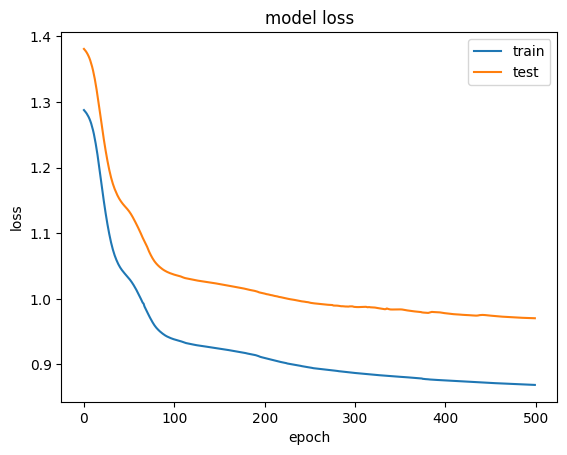

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [25]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': test_target})
error_df.describe()

21/21 [==============================] - 0s 2ms/step


,reconstruction_error
count,672.000000
mean,0.878635
std,1.326890
min,0.133712
25%,0.504700
50%,0.597015
75%,1.164752
max,30.634506


In [26]:
error_df.head()

,reconstruction_error,true_class
836,0.358287,0
477,0.278272,0
350,0.151707,0
893,0.540726,0
923,0.416697,0


In [55]:
# true_class 값들의 분포를 확인
print(error_df['true_class'].value_counts())

true_class
1    480
0    192
Name: count, dtype: int64


In [39]:
threshold= 0.5

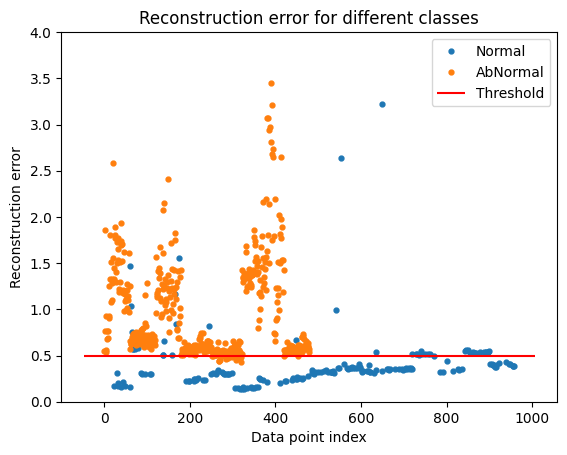

In [63]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    name = int(name)
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "AbNormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.ylim(0,4)
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

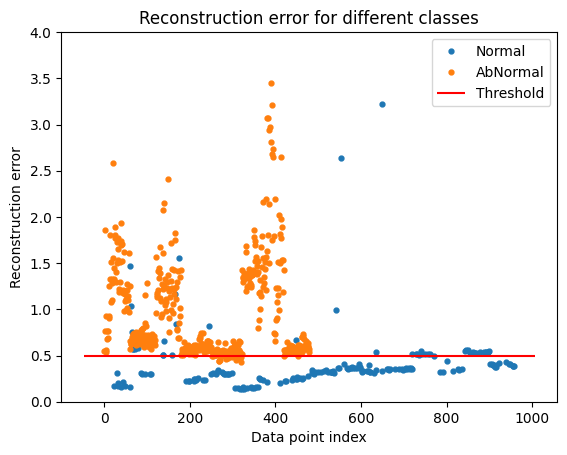

In [61]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

# 먼저 클래스가 0인지 1인지에 따라 다른 라벨을 한 번만 그리기 위한 플래그 설정
plotted_labels = {0: False, 1: False}

for name, group in groups:
    # name을 정수로 변환하여 KeyError 방지
    name = int(name)
    
    label = "AbNormal" if name == 1 else "Normal"
    
    # 각 라벨에 대해 한 번만 추가하도록 조건 설정
    if not plotted_labels[name]:
        ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='', 
                label=label)
        plotted_labels[name] = True
    else:
        # 이미 그린 경우에는 라벨 없이 그림
        ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='')

# hlines는 그래프 이후 x축 범위를 설정해서 그리는 것이 적합
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')

# 범례 추가
ax.legend()

plt.ylim(0, 4)
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()


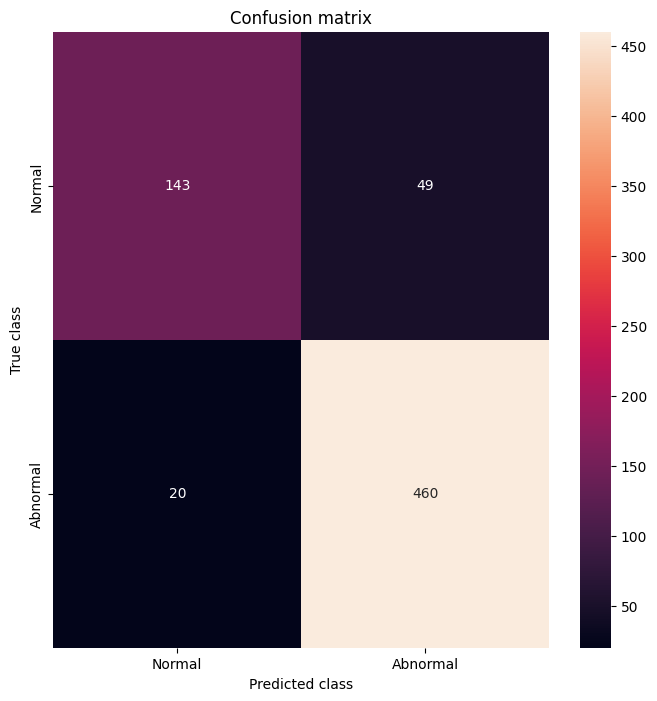

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       192
           1       0.90      0.96      0.93       480

    accuracy                           0.90       672
   macro avg       0.89      0.85      0.87       672
weighted avg       0.90      0.90      0.89       672



In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

error_df['true_class'] = error_df['true_class'].astype(int)

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [71]:
test_target = test_target.astype(int)

# 재구성 오류 계산
reconstruction_error = np.mean((test_data - autoencoder.predict(test_data))**2, axis=1)

# 재구성 오류가 임계값을 초과하면 이상치로 간주
y_pred = (reconstruction_error > threshold).astype(int)

from sklearn.metrics import accuracy_score

# test_target에는 실제 라벨(정상: 0, 이상치: 1)이 저장되어 있다고 가정
accuracy = accuracy_score(test_target, y_pred)

print(f"Accuracy: {accuracy:.4f}")


21/21 [==============================] - 0s 2ms/step
Accuracy: 0.8973


In [73]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [83]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    num_classes,  # 추가: 출력 유닛 수를 위한 매개변수
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    
    # 출력층 수정: num_classes를 사용
    outputs = layers.Dense(num_classes, activation="softmax")(x)  # num_classes로 출력 유닛을 맞춤
    return keras.Model(inputs, outputs)

In [87]:
import keras
from tensorflow.keras import layers

# 모델 생성
num_classes = len(np.unique(train_target))  # 클래스 수를 계산
input_shape = train_data.shape[1:]

model = build_model(
    input_shape=input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
    num_classes=num_classes  # 출력 유닛 수로 클래스 수를 전달
)

# 모델 컴파일
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)

model.summary()

# 모델 학습
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
)

# 모델 평가
model.evaluate(x_test, y_test, verbose=1)


IndexError: Exception encountered when calling layer "softmax" "                 f"(type Softmax).

tuple index out of range

Call arguments received by layer "softmax" "                 f"(type Softmax):
  • inputs=tf.Tensor(shape=(None, 4), dtype=float32)
  • mask=None

In [95]:
import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # 3D 입력 형상으로 변환 (batch_size, seq_len, embed_dim)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)  # Query, Key, Value가 모두 inputs로 설정됨
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    
    # FFN (Feed-Forward Network) 부분
    x_ffn = layers.Dense(ff_dim, activation="relu")(x)
    x_ffn = layers.Dropout(dropout)(x_ffn)
    x_ffn = layers.LayerNormalization(epsilon=1e-6)(x_ffn)
    
    return x_ffn

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    num_classes,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    # 입력을 3D로 변환 (batch_size, seq_len, embed_dim)
    if len(input_shape) == 2:  # 2D input -> reshape to 3D
        x = layers.Reshape((input_shape[0], input_shape[1], 1))(x)
    elif len(input_shape) == 1:  # 1D input -> reshape to 3D
        x = layers.Reshape((input_shape[0], 1))(x)
    
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

# 모델 생성
num_classes = len(np.unique(train_target))  # 클래스 수를 계산
input_shape = train_data.shape[1:]

model = build_model(
    input_shape=input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
    num_classes=num_classes
)

# 모델 컴파일
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)

model.summary()

# 모델 학습
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
)

# 모델 평가
model.evaluate(X_test, y_test, verbose=1)


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 211)]        0           []                               
                                                                                                  
 reshape_3 (Reshape)            (None, 211, 1)       0           ['input_10[0][0]']               
                                                                                                  
 multi_head_attention_17 (Multi  (None, 211, 1)      7169        ['reshape_3[0][0]',              
 HeadAttention)                                                   'reshape_3[0][0]']              
                                                                                                  
 dropout_27 (Dropout)           (None, 211, 1)       0           ['multi_head_attention_17[0

NameError: name 'X_train' is not defined